In [9]:
import sys
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
PATH_TO_PROFILE = 'bsi_zoo/data/benchmark_data_CC120264_gamma_map_fixed_orient.json'
METRIC_NAMES = ['euclidean_distance', 'mse']

In [11]:
with open(PATH_TO_PROFILE) as f:
    data = json.load(f)
    print(data)


{'alpha': {'0.99': {'euclidean_distance': [0.0, 0.0, 0.0], 'mse': [5.734229579089109e-09, 5.734229579089109e-09, 5.734229579089109e-09]}, '0.9': {'euclidean_distance': [0.0, 0.0, 0.0], 'mse': [7.031931925646786e-07, 7.031931925646786e-07, 7.031931925646786e-07]}, '0.8': {'euclidean_distance': [0.0, 0.0, 0.0], 'mse': [4.771794292828762e-06, 4.771794292828762e-06, 4.771794292828762e-06]}, '0.5': {'euclidean_distance': [0.07166956161961778, 0.07166956161961778, 0.07166956161961778], 'mse': [0.00039051907401310747, 0.00039051907401310747, 0.00039051907401310747]}}, 'nnz': {'3': {'euclidean_distance': [0.07166956161961778, 0.07166956161961778, 0.07166956161961778], 'mse': [0.00039051907401310747, 0.00039051907401310747, 0.00039051907401310747]}, '10': {'euclidean_distance': [0.05541239142422494, 0.05541239142422494, 0.05541239142422494], 'mse': [0.0014327134689810389, 0.0014327134689810389, 0.0014327134689810389]}}}


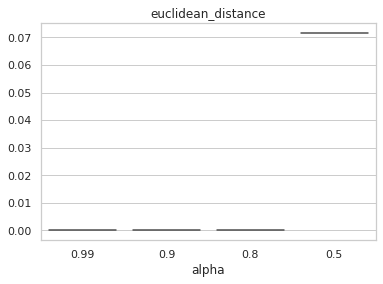

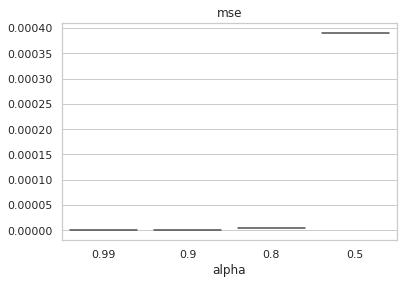

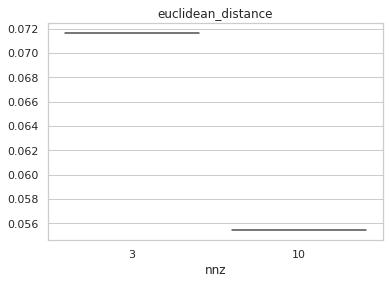

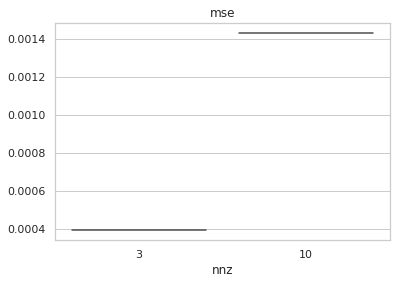

In [12]:
sns.set_theme(style="whitegrid")


for arg in data.keys():
    df = data[arg]
    for metric in METRIC_NAMES:
        ab = pd.concat({k: pd.DataFrame(df[str(k)][metric]) for k in df.keys()}, axis=1)
        ab.columns = df.keys()
        
        plt.figure()
        ax = sns.violinplot(data=ab)
        ax.set_title(metric)
        ax.set_xlabel(arg)